In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

Problem 1 [5 points] – IRIS/HISTOGRAMS
 IRIS: Draw histograms of each of the four dimensions irrespective of class label
 IRIS: Draw histograms each dimension for each class separately
 Comparing the above which dimension will discriminate the three classes best? 

In [5]:
dfiris = pd.read_csv(r'C:\Users\rajes\OneDrive\Documents\AMPBA\MLUL\iris\Iris.csv')
iris_dimension =  [u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',u'PetalWidthCm']
iris_class = ['Iris-setosa','Iris-versicolor','Iris-virginica']

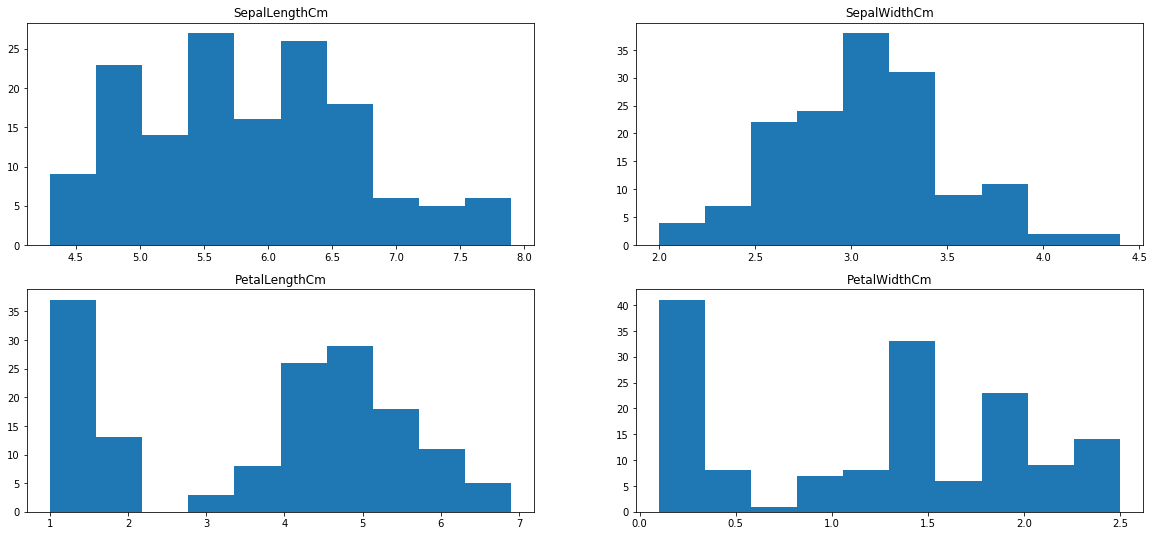

In [6]:
fig = plt.figure(figsize = [20,9])

i=0 
for dim in iris_dimension:
    i = i+1
    plt.subplot(2,2,i)
    plt.hist(dfiris[dim],color=None)
    plt.title(dim)
plt.show()


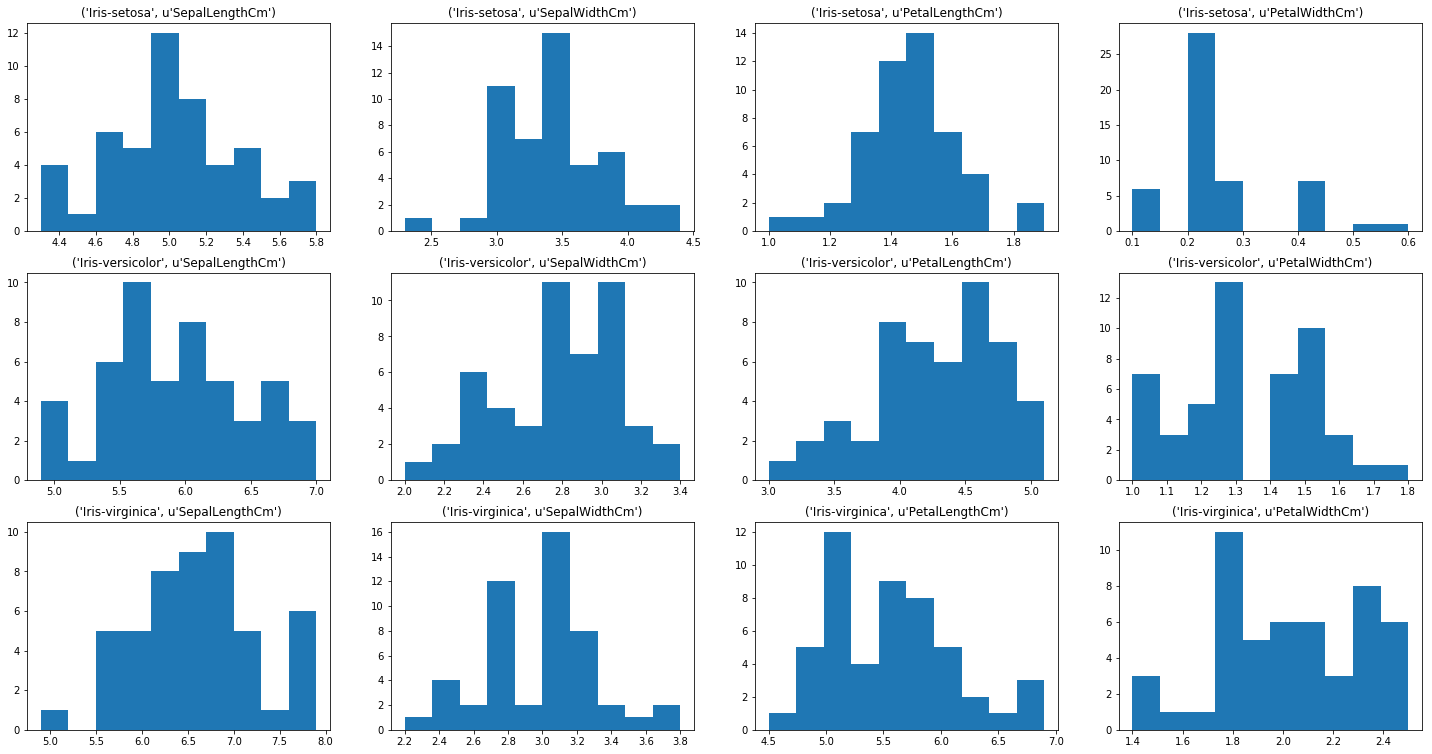

In [7]:
fig= plt.figure(figsize=[25,13])
i=0
for clas in iris_class:
    for dim in iris_dimension:
        histX = dfiris[dfiris['Species']==clas][dim]
        i=i+1
        title = clas, dim
        plt.subplot(3,4,i)
        plt.hist(x=histX)
        plt.title(title)
plt.show()

Problem 2 [5 points] – BOSON/HISTOGRAMS
 BOSON: Draw histograms of each of the 30 dimensions irrespective of class
 BOSON: Draw histograms of each of the 30 dimensions for each of the two classes
 Comparing the above which dimension will discriminate the three classes best? 

In [8]:
dfHiggsBoson = pd.read_csv(r'C:/Users/rajes/OneDrive/Documents/AMPBA/MLUL/higgs-boson/training.csv')


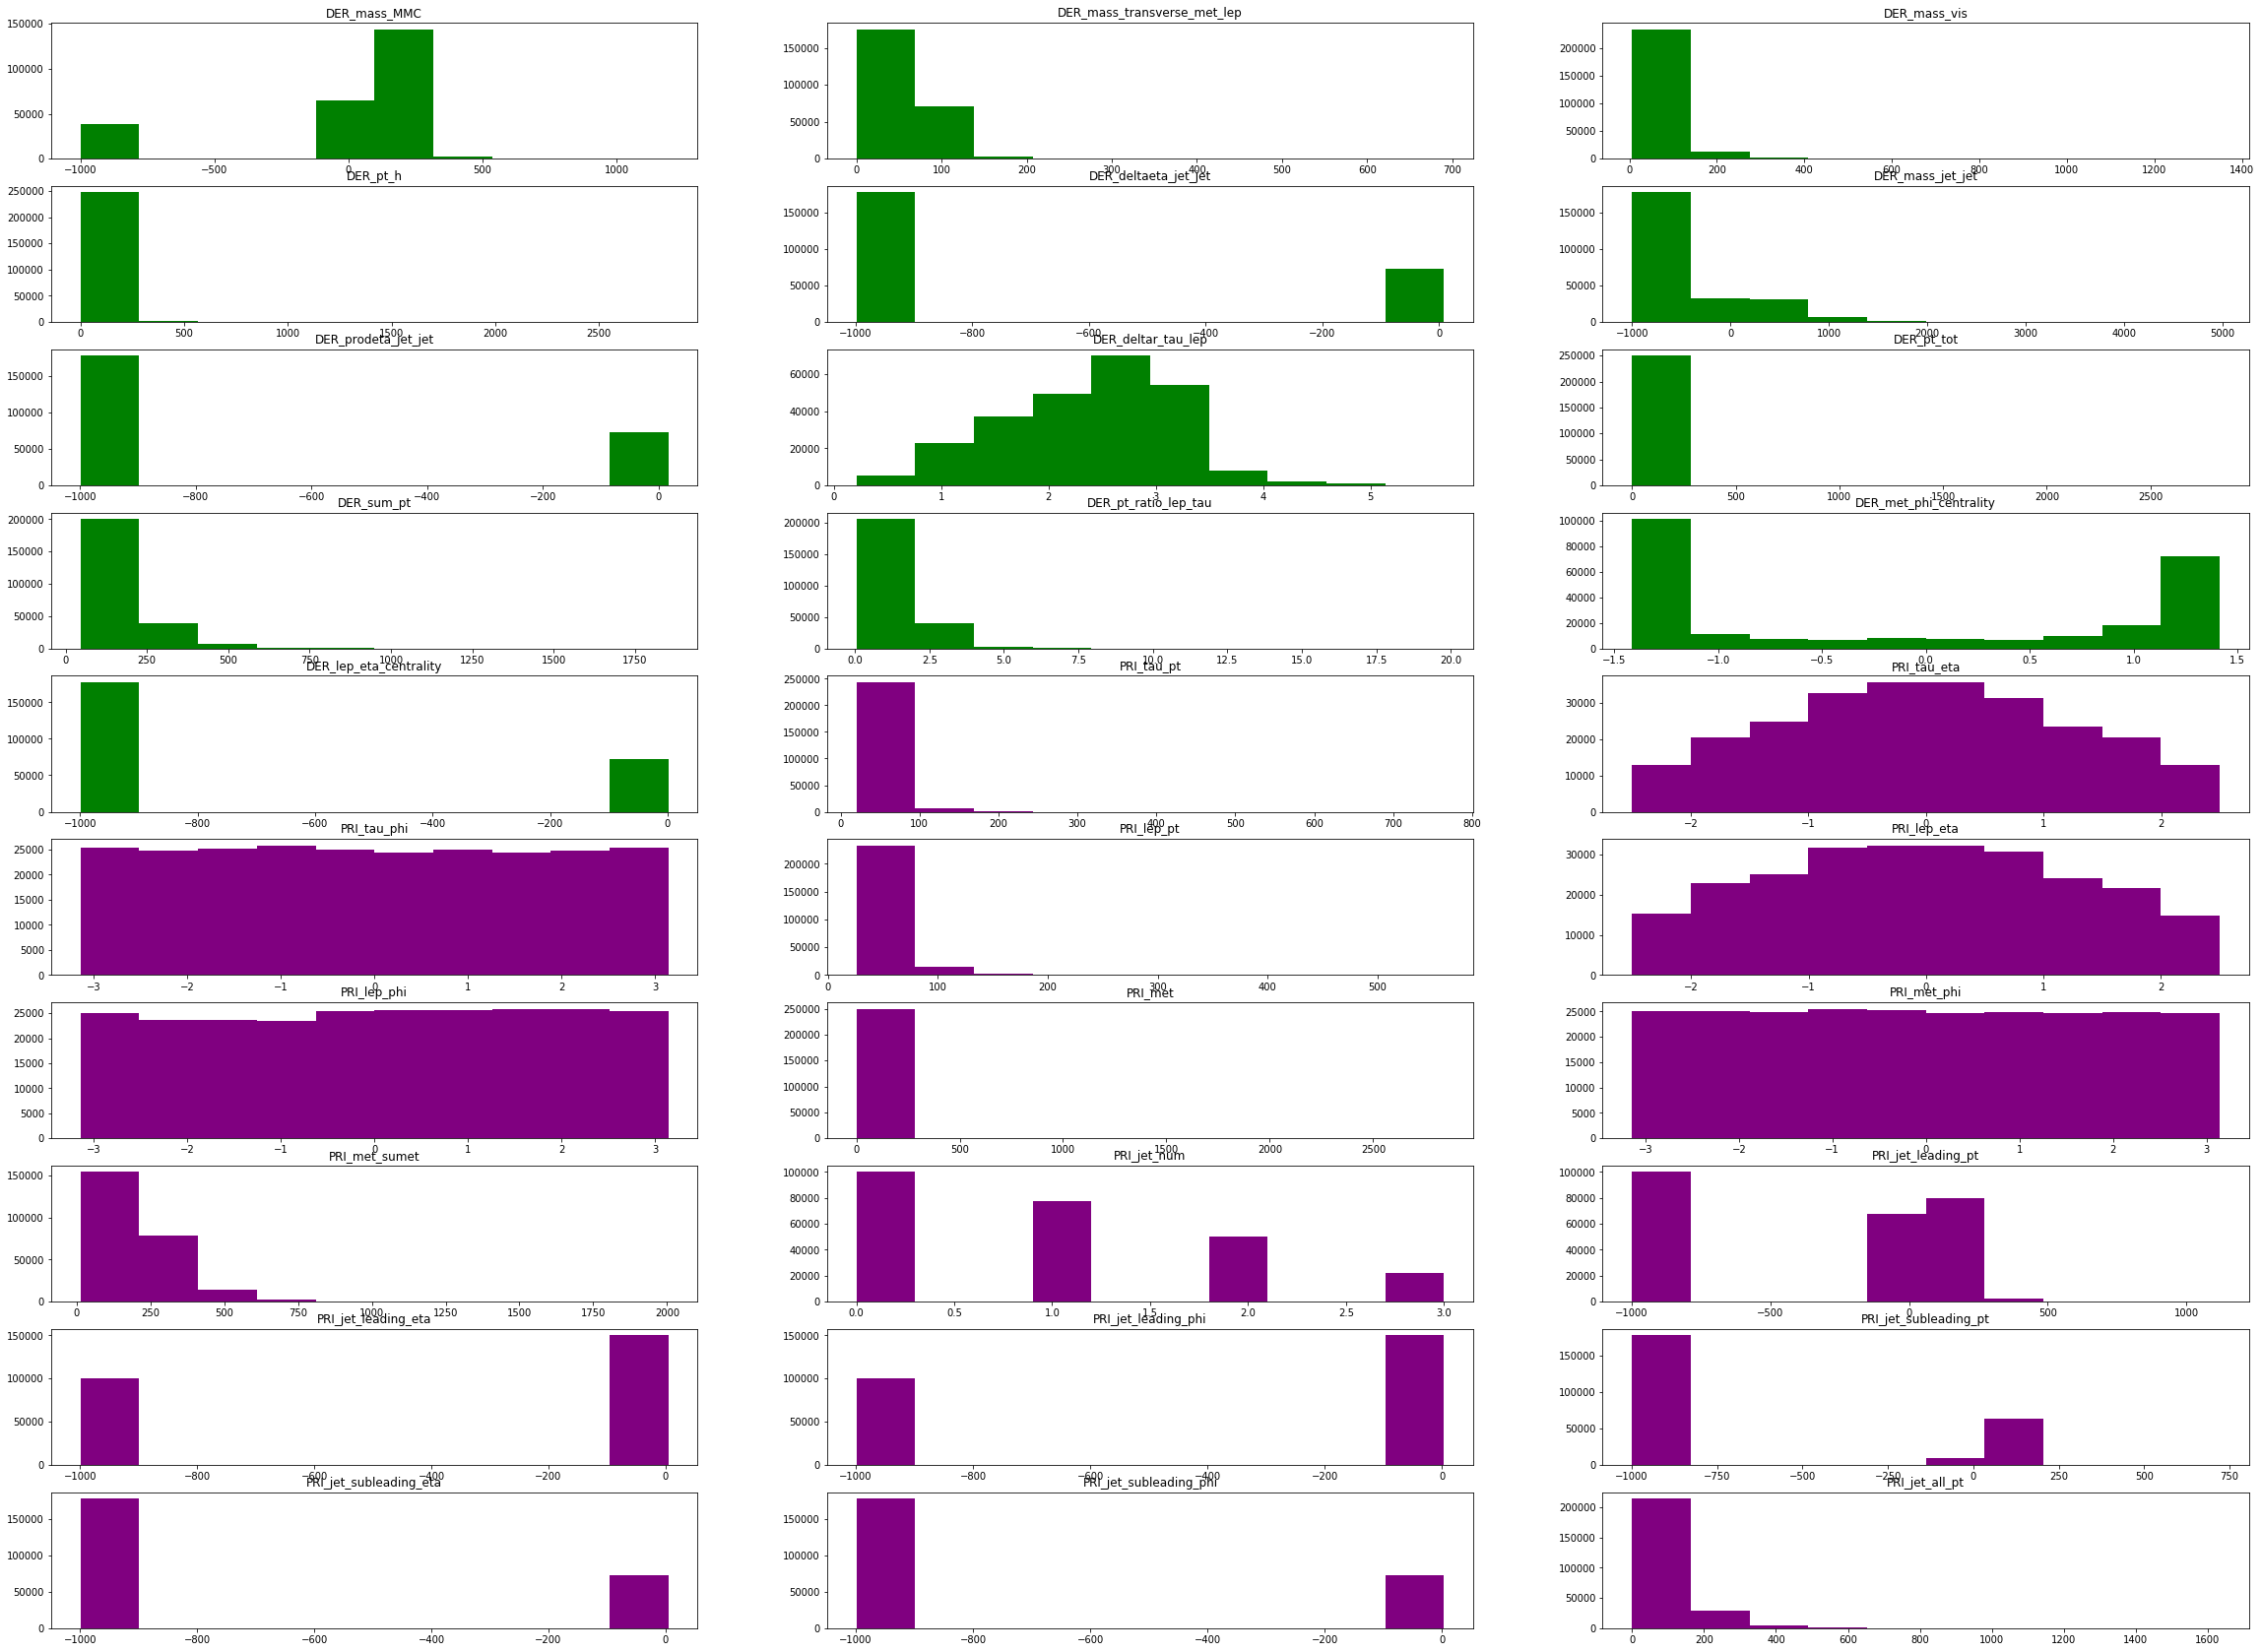

In [9]:
def getDimesionType(dim):
    if len(dim)>3:
        if dim[0:3] == 'DER':
            return 'green'
        elif dim[0:3] == 'PRI':
            return 'purple'
        else:
            return 'white'
    else:
        return 'white'

fig = plt.figure(figsize=[40,30])

i =1 
for dim in dfHiggsBoson.columns:
    if ((i<31) & (dim != 'EventId')):
        plt.subplot(10,3,i)
        plt.title(dim)
        plt.hist(dfHiggsBoson[dim], color = getDimesionType(dim))
        i = i +1
plt.show()        

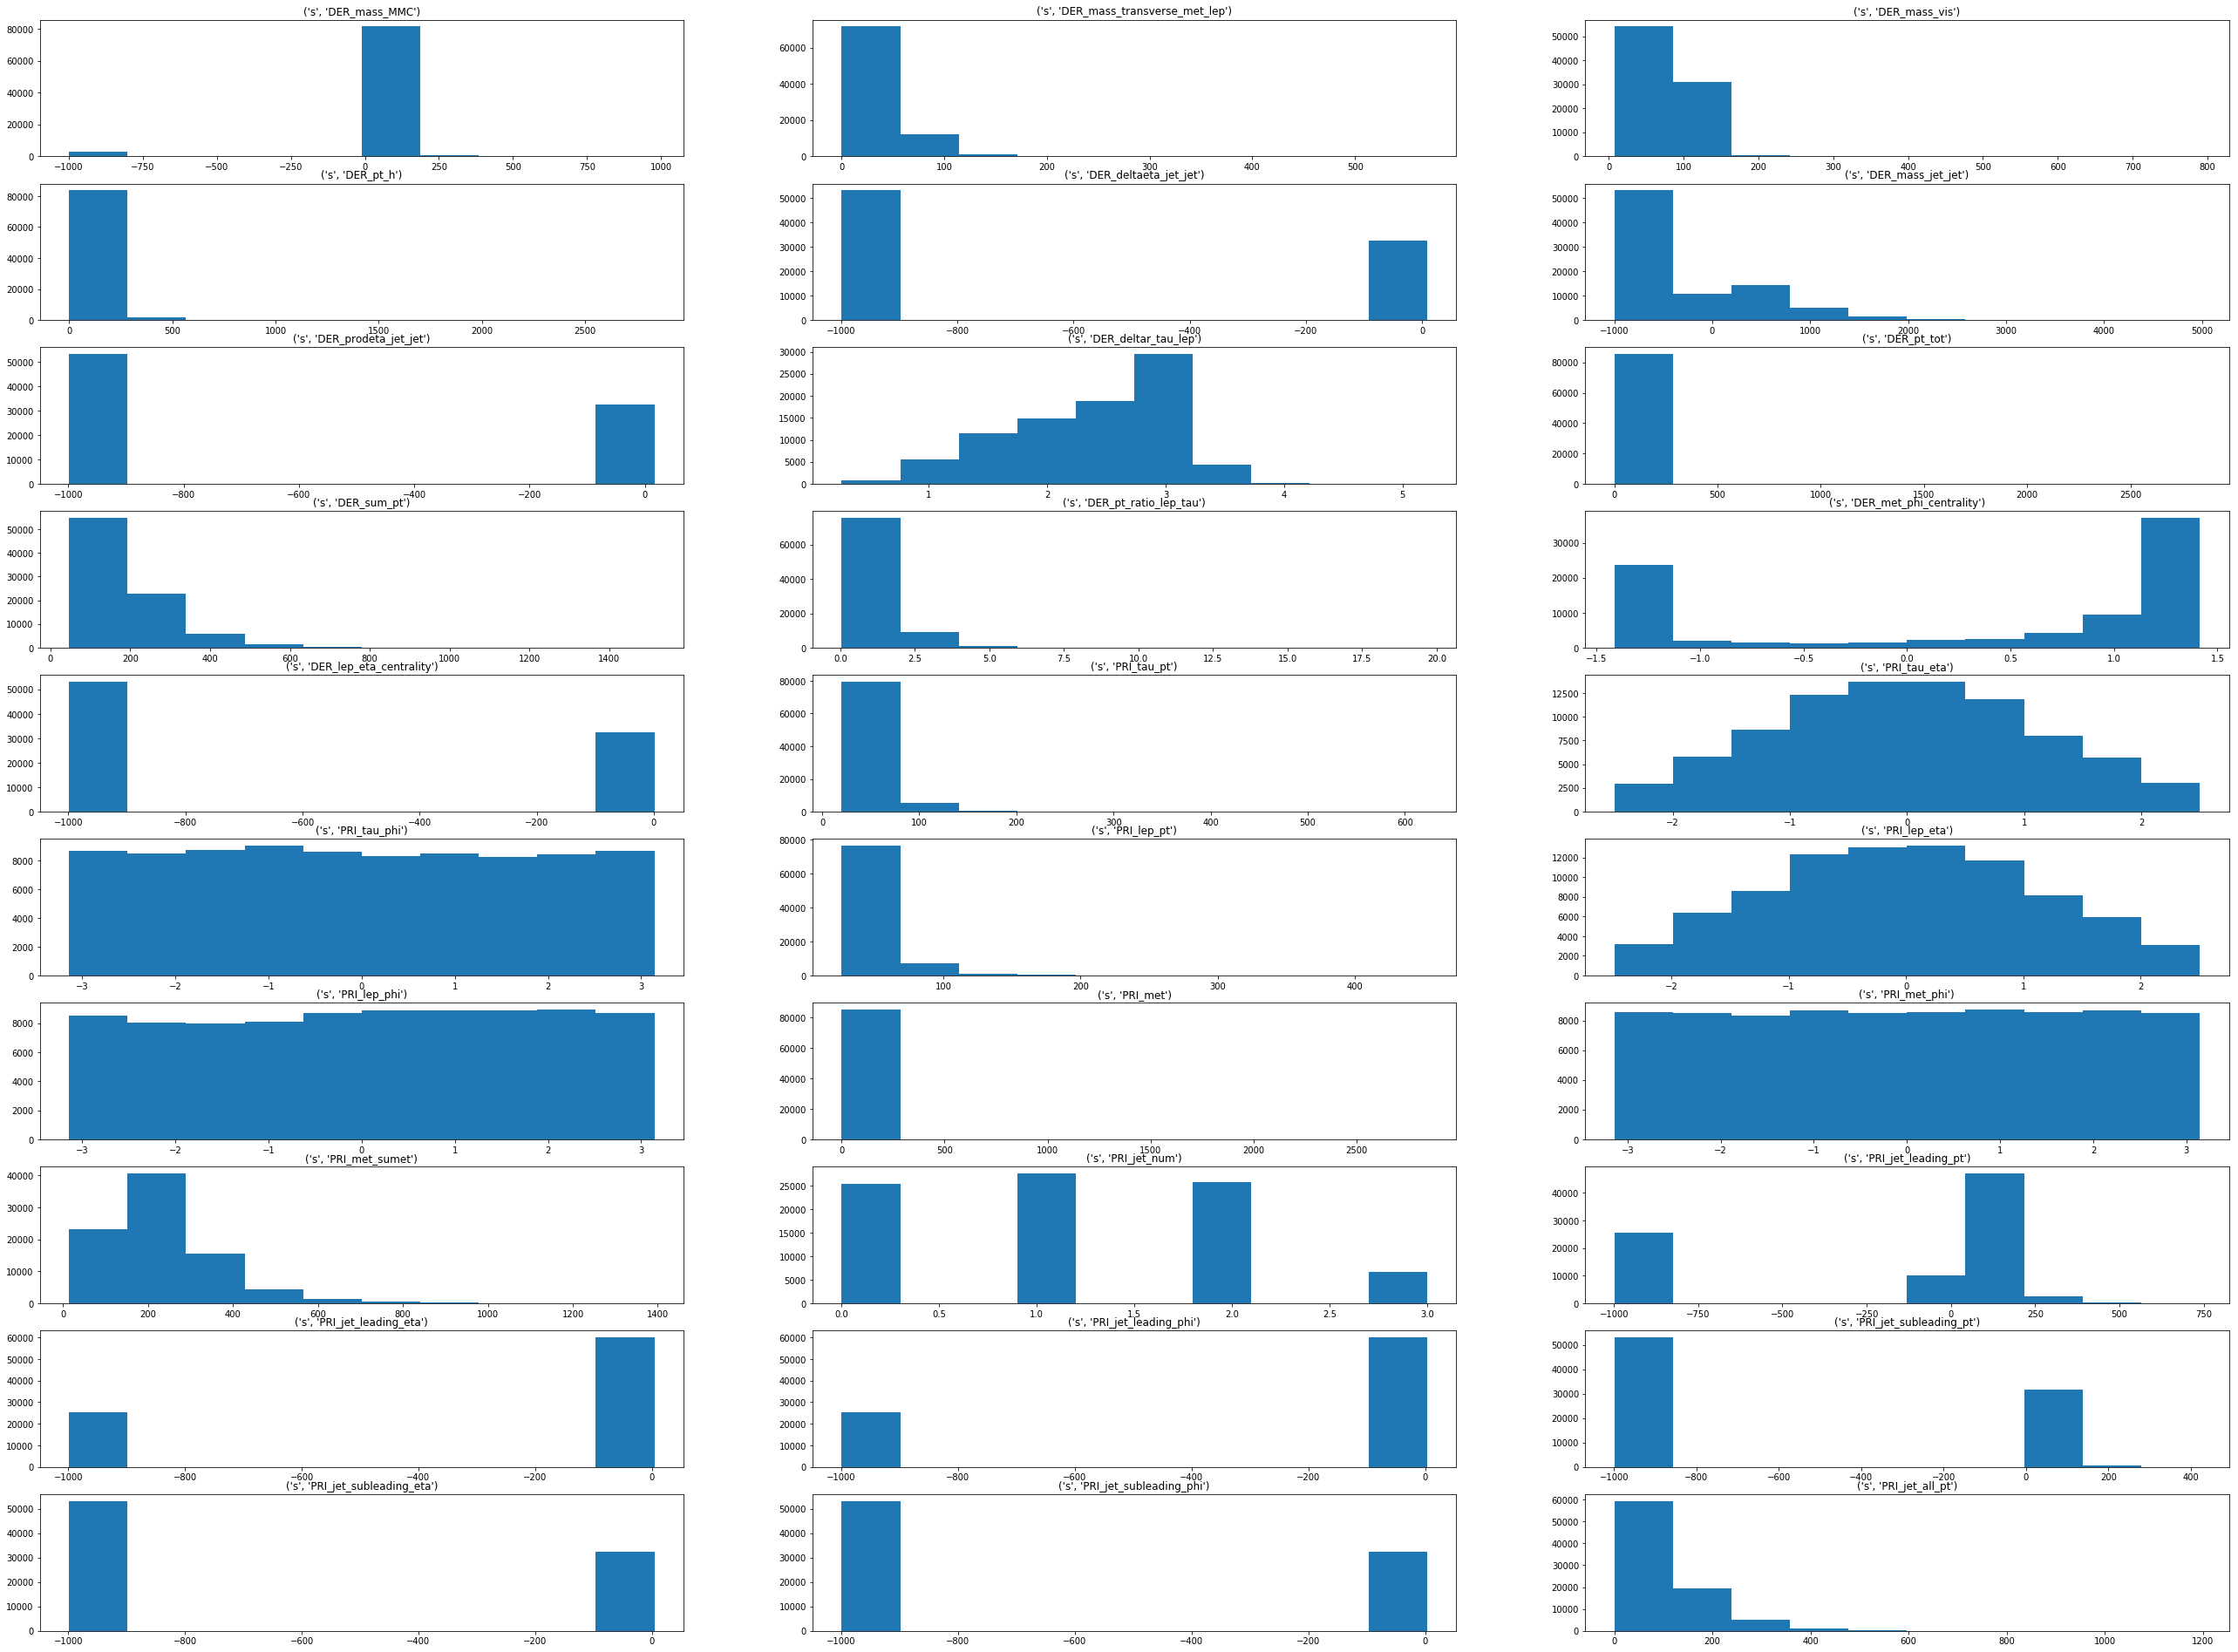

In [10]:
def plotHiggsBoson(label):
    fig = plt.figure(figsize=[45,34])
    dfHiggsBoson_Class = label
    
    i=1
    for dim in dfHiggsBoson.columns:
        if ((i<31) & (dim != 'EventId')):
            title = dfHiggsBoson_Class,dim
            histX = dfHiggsBoson[dfHiggsBoson['Label'] == dfHiggsBoson_Class][dim]
            plt.subplot(10,3,i )
            plt.hist(x=histX)
            plt.title(title)
            i = i +1
    plt.show()
    
plotHiggsBoson('s')    

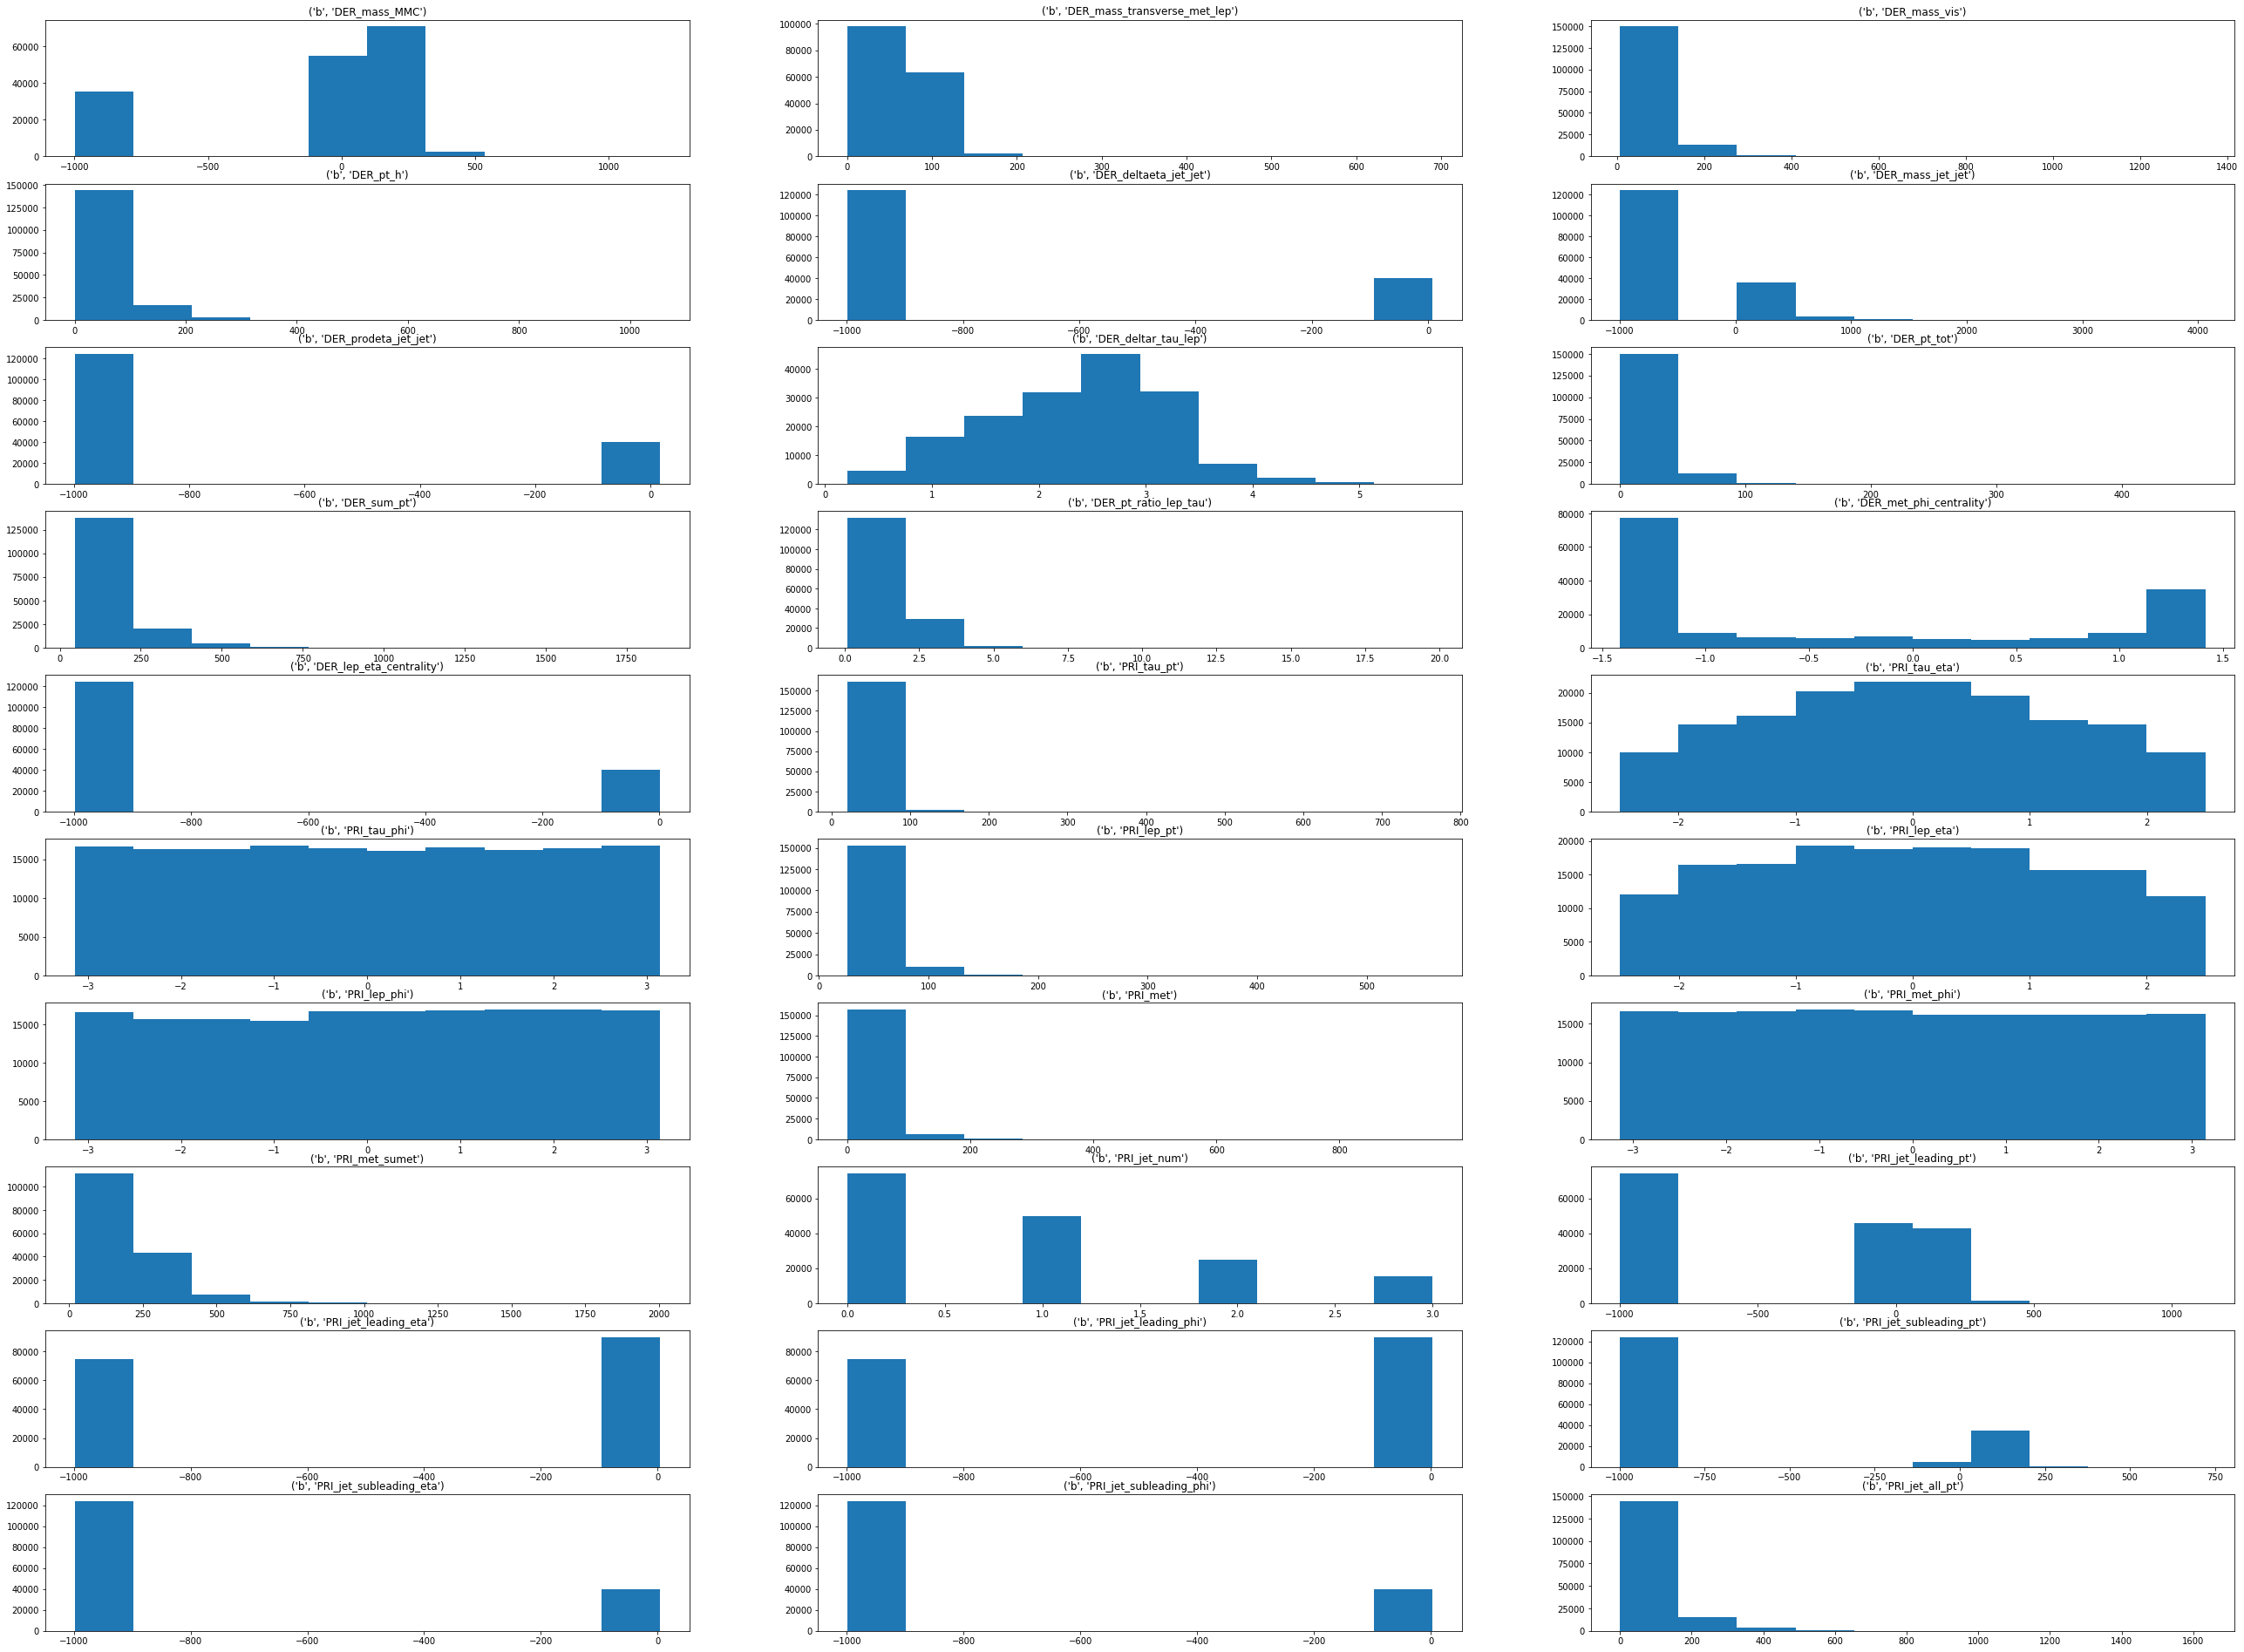

In [11]:
plotHiggsBoson('b')    

Problem 3 [10 points] – IRIS/SCATTERPLOTS
 Draw the scatterplots of the 4 choose 2 pairs of dimensions,
 Color code each data point by its class.
 Which two-dimensional scatter plot shows maximum separation among classes?

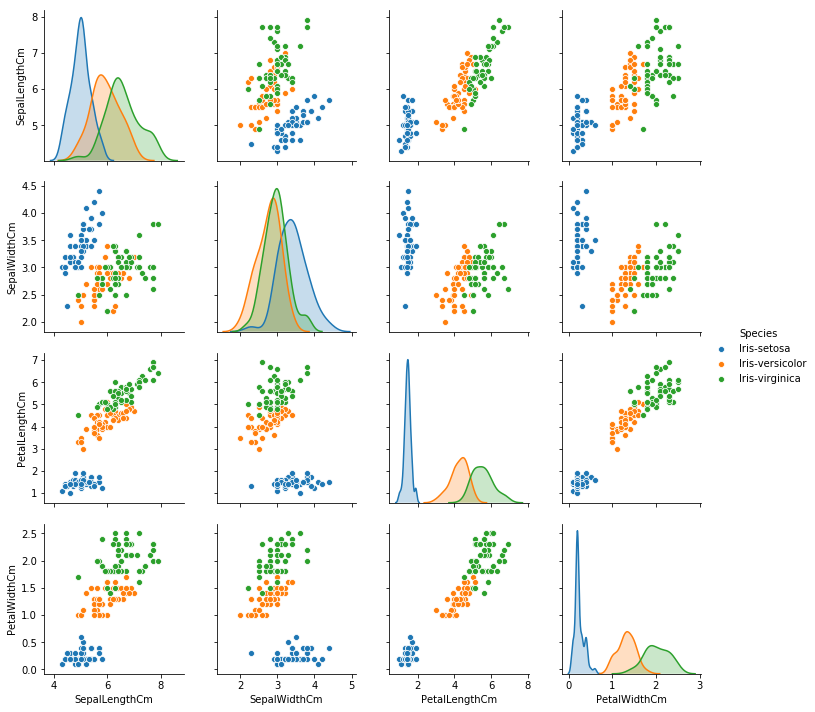

In [310]:
sns.pairplot(dfiris, vars = iris_dimension, hue='Species' )

Problem 4 [5 points] – BOSON/SCATTERPLOTS
 From Problem 2, can you tell which dimensions could use a log?
  - All the columns excpet the below 
    PRI_tau_phi
    PRI_lep_phi
    PRI_tau_eta
    PRI_lep_eta
    PRI_met_phi
    
 Now take two such dimensions and draw a scatterplot between them
    - 'DER_sum_pt', 'DER_mass_vis'
    
 One WITHOUT taking logs vs. one WITH taking logs.
 Color code the class labels (2-class problem).
 Sample the data if it is too much to see.
 Notice how taking the logs makes visualization better?

Text(0.5,1,'log_DER_sum_pt vs log_DER_mass_vis')

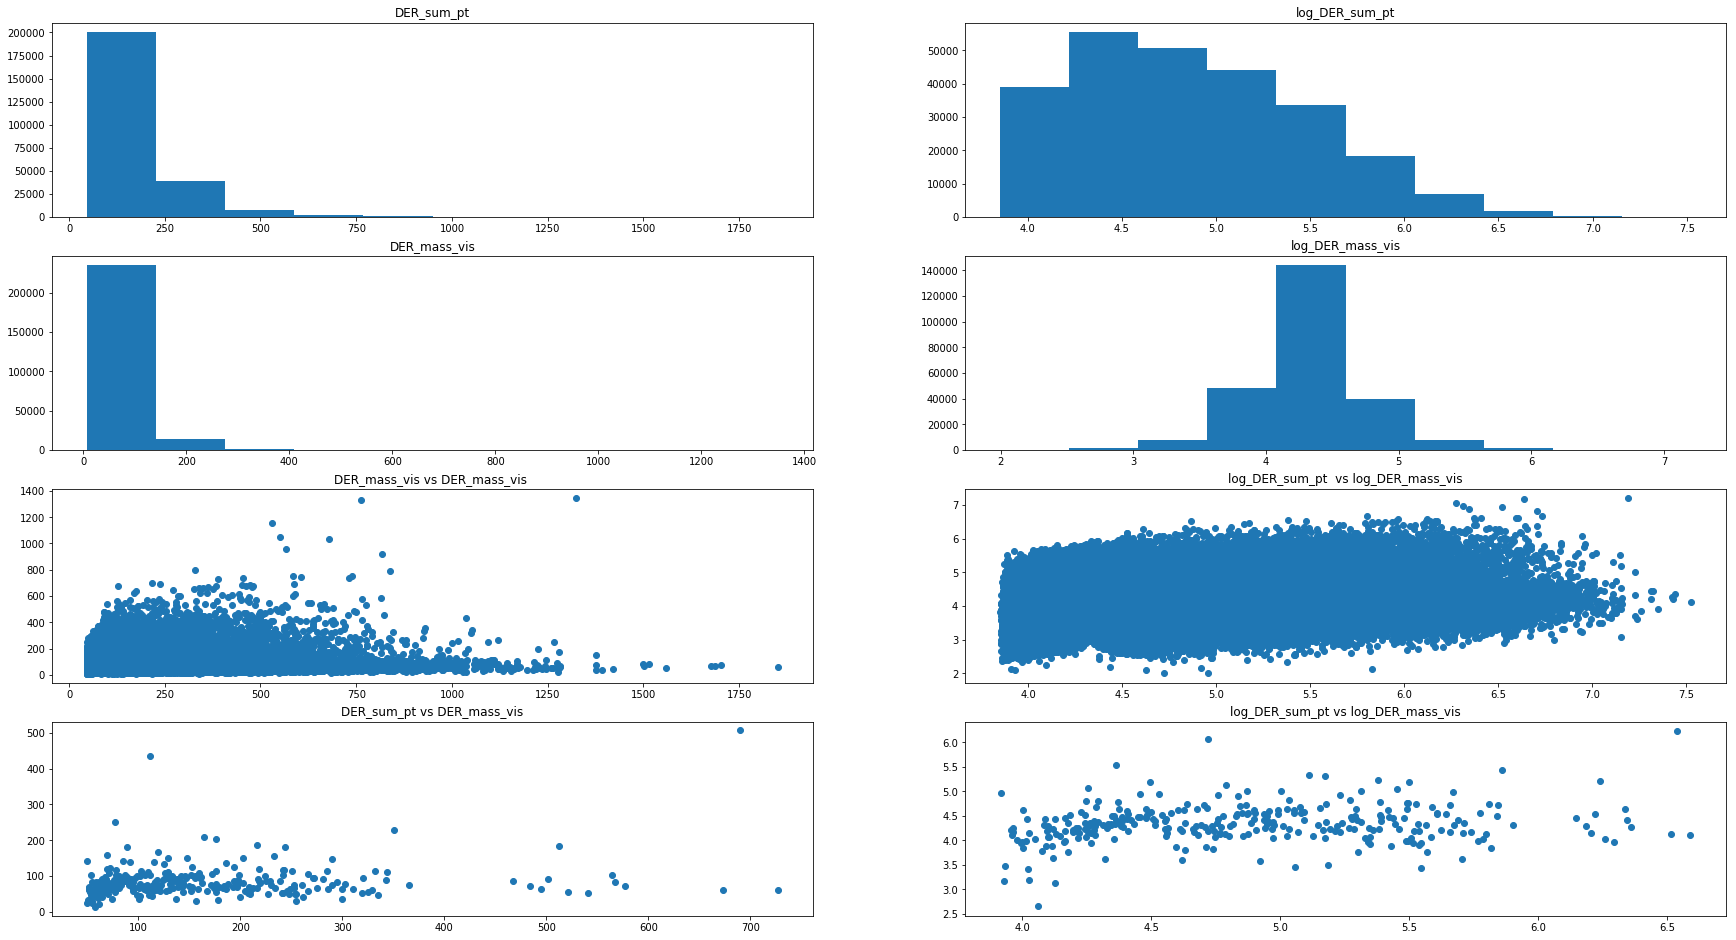

In [12]:
#Apply log to the selected columns
#to_log = ['DER_sum_pt', 'DER_deltar_tau_lep']
to_log = ['DER_sum_pt', 'DER_mass_vis']

#DER_mass_mmc


#to_log = ['DER_met_phi_centrality','DER_mass_transverse_met_lep']
dfHiggsBoson_log = dfHiggsBoson[to_log].applymap(lambda x: np.log(x+1))

#plt.scatter(dfHiggsBoson_log['DER_sum_pt'], dfHiggsBoson_log['DER_deltar_tau_lep'] )
dfHiggsBoson_log.columns = 'log_' + dfHiggsBoson_log.columns

df4 = pd.concat([dfHiggsBoson, dfHiggsBoson_log],axis=1 )

#ns.pairplot(df4, vars = dfHiggsBoson_log.columns , hue='Label')
fig = plt.figure(figsize=[30,25])
plt.subplot(6,2,1)
#DER SUM PT Variale before and after log
plt.hist(dfHiggsBoson['DER_sum_pt'])
plt.title("DER_sum_pt")
plt.subplot(6,2,2)
plt.hist(df4['log_DER_sum_pt'])
plt.title("log_DER_sum_pt")

#DER MASS PT Variale before and after log
plt.subplot(6,2,3)
plt.hist(df4['DER_mass_vis'])
plt.title("DER_mass_vis")
plt.subplot(6,2,4)
plt.hist(df4['log_DER_mass_vis'])
plt.title("log_DER_mass_vis")


#Scatter Plot DER SUM PT BEFORE AND AFTER LOG
plt.subplot(6,2,5)
plt.scatter(dfHiggsBoson['DER_sum_pt'], dfHiggsBoson['DER_mass_vis'] )
plt.title("DER_mass_vis vs DER_mass_vis " )
plt.subplot(6,2,6)
plt.scatter(df4['log_DER_sum_pt'], df4['log_DER_mass_vis'])
plt.title("log_DER_sum_pt  vs log_DER_mass_vis")

#Scatter Plot DER SUM PT BEFORE AND AFTER LOG - For SAMPLES
plt.subplot(6,2,7)
plt.scatter(dfHiggsBoson['DER_sum_pt'].sample(n=300, random_state=1), dfHiggsBoson['DER_mass_vis'].sample(n=300, random_state=1))
plt.title("DER_sum_pt vs DER_mass_vis")
plt.subplot(6,2,8)
plt.scatter(df4['log_DER_sum_pt'].sample(n=300, random_state=1) , df4['log_DER_mass_vis'].sample(n=300, random_state=1))
plt.title("log_DER_sum_pt vs log_DER_mass_vis")



Problem 5 [10 points] – DIGITS/PCA 
 We will do 2-D PCA projection of EACH class separately. 
 Draw 10 scatter plots, one for each class. 
 In each scatter plot, first do a 2-D PCA and plot them on a scatter plot
 If too much data, then sample 200 points from each class for the visualization 
 Comment on any interesting patterns – e.g. do you see a “higher spread” in digits that are written in multiple ways? 

In [34]:
dfDigitRecog = pd.read_csv(r'C:\Users\rajes\OneDrive\Documents\AMPBA\MLUL\digit-recognizer\train.csv')

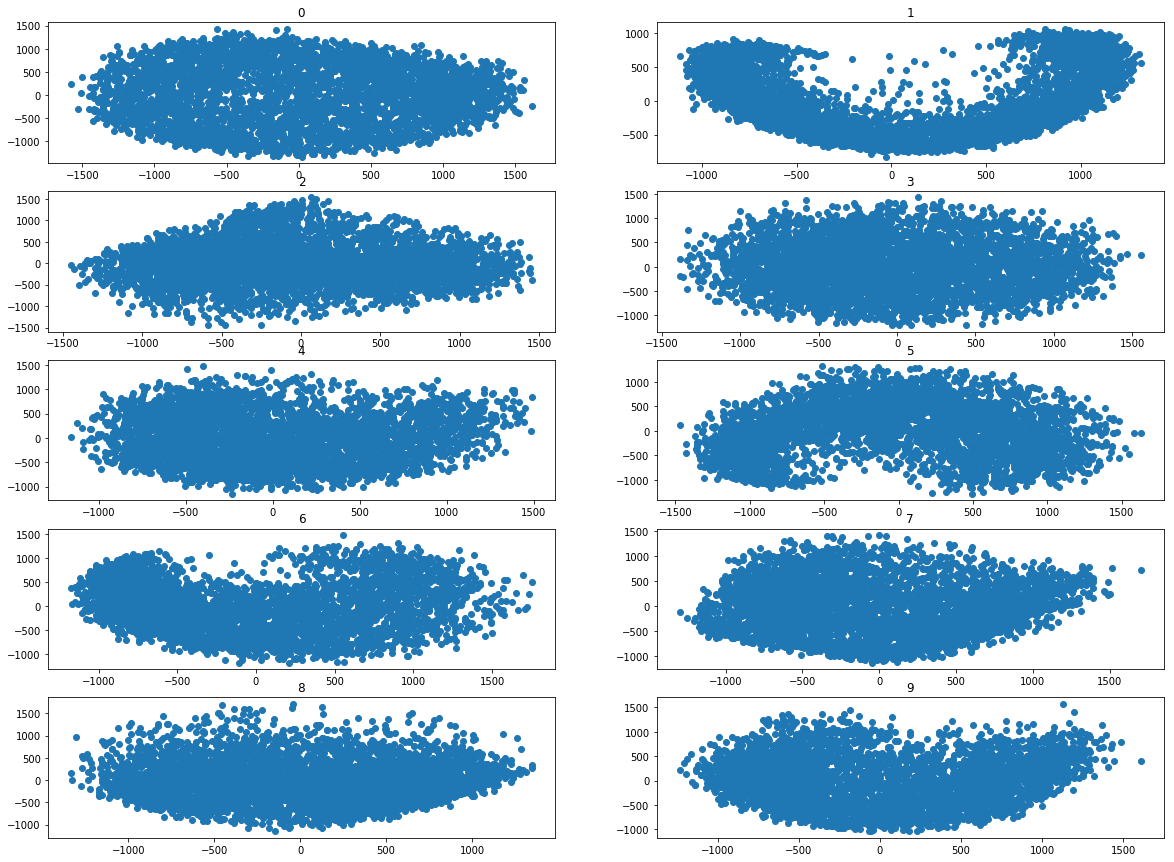

In [35]:
fig = plt.figure(1, figsize=(20,15))
i=1
for label in range(0,10):
    plt.subplot(5,2,i)
    plt.title(label)
    
    
    dfDigitRecog_Filtered = dfDigitRecog[dfDigitRecog['label']==label]
    dfDigitRecog_Filtered1 = dfDigitRecog_Filtered.drop(['label'], axis=1)
    
    dfDigitRecog_PCA = PCA(n_components=2).fit_transform(dfDigitRecog_Filtered1)
    
    dfDigitRecog_PCA = pd.DataFrame(data = dfDigitRecog_PCA, columns=['PCA1', 'PCA2'])
    final_dfDigitRecog_PCA = pd.concat([dfDigitRecog_PCA, dfDigitRecog_Filtered['label']], axis=1)
    
    plt.scatter(dfDigitRecog_PCA['PCA1'], dfDigitRecog_PCA['PCA2'])
    i = i+1

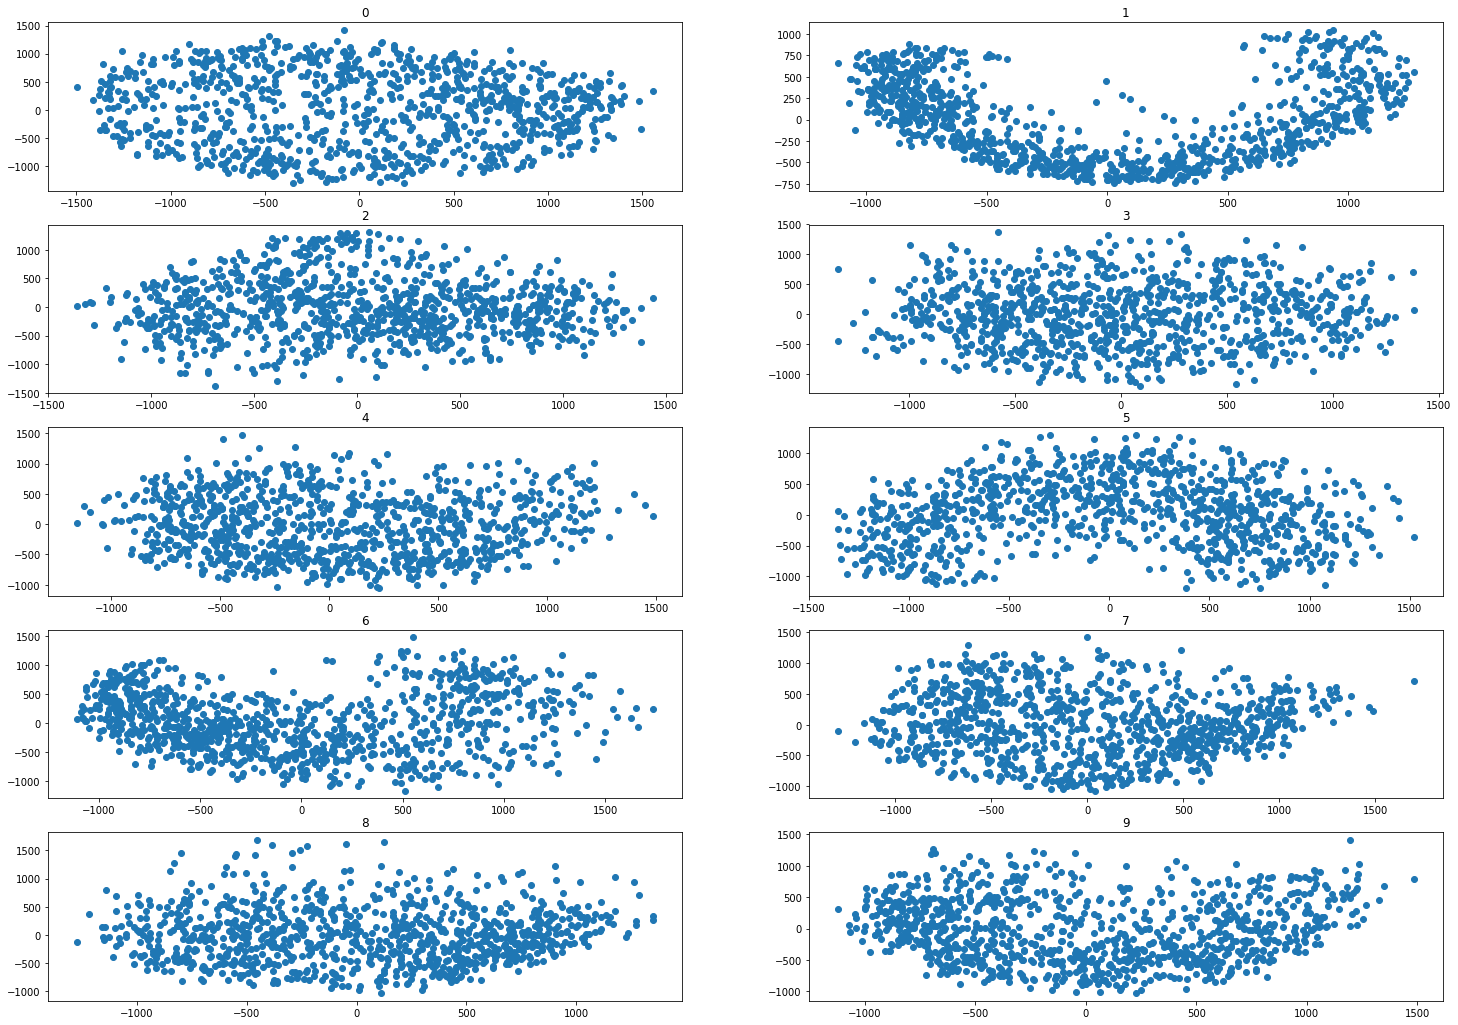

In [33]:
fig = plt.figure(1, figsize=(25,18))

i=1
for label in range(0,10):
    plt.subplot(5,2,i)
    plt.title(label)
    
    dfDigitRecog_Filtered = dfDigitRecog[dfDigitRecog['label']==label]
    
    
    DigitRecog_PCA = PCA(n_components=2).fit_transform(dfDigitRecog_Filtered)
        
    dfDigitRecog_PCA = pd.DataFrame(data = DigitRecog_PCA, columns=['PCA1', 'PCA2']).sample(1000)
    final_dfDigitRecog_PCA = pd.concat([dfDigitRecog_PCA, dfDigitRecog_Filtered['label']], axis=1)
    plt.scatter(final_dfDigitRecog_PCA['PCA1'],final_dfDigitRecog_PCA['PCA2'] ,  cmap='rainbow')

    i = i+1

Problem 6 [15 points] – DIGITS/PCA/CLUSTERING/INITIALIZATION 
 Convert raw data into a 30-dimensional data 
     Take all the DIGITS data 
     Do a PCA on the entire data
     Project the data in the top-30 PCA dimensions 
     We will now do clustering in this data 
     Let’s call it DIGITS_PCA_30 dataset 
     We want to see the effect of initialization on K-means clustering. 
     We will build 10 clusters (K = 10) in the following experiments 

 We will do 11 initializations: 
    o Initialize the 10 cluster centers from class 0 
    o Initialize the 10 cluster centers from class 1 o ... 
    o Initialize the 10 cluster centers from class 9
    o Initialize the 10 cluster centers – one from each class

 For each of these initializations 
    o Do k-means clustering 
    o Use stopping criteria: When no cluster changes happen 
    o Measure the Number of iterations it took to converge in each case 
    o Measure the Purity (See below) of the final clustering you got in each case 
    o Tabulate the results in a table with 11 rows and 3 columns 
         Column 1 – initialization method 
         Column 2 – number of iterations to converge 
         Column 3 – purity of final cluster 

In [36]:
Digits_PCA_30 = PCA(n_components=30).fit_transform(dfDigitRecog)
#Digits_PCA_30

df_Digits_PCA_30 = pd.DataFrame(data =Digits_PCA_30)
Y = dfDigitRecog['label']
df_Digits_PCA_30_Lbl = pd.concat([df_Digits_PCA_30, Y], axis=1)
#df_Digits_PCA_30_Lbl[dfDigitRecog['label']==1]
   

In [37]:
def getClusterCentriodByClass(label):
    df_Digits_PCA_30 = df_Digits_PCA_30_Lbl[df_Digits_PCA_30_Lbl['label']==label]
    df_Digits_PCA_30_WoLabel = df_Digits_PCA_30.drop('label', axis=1)
    Centroids = df_Digits_PCA_30_WoLabel.sample(n=10).to_numpy()
    return Centroids

def getOneClusterCentriodsfromEachClass():
    dfClusterCentroidsEachClass = pd.DataFrame() 
    
    for i in range(0,10):
        df_Digits_PCA_30 = df_Digits_PCA_30_Lbl[df_Digits_PCA_30_Lbl['label']==i]
        df_Digits_PCA_30_WoLabel = df_Digits_PCA_30.drop('label', axis=1)
        CentrVal = df_Digits_PCA_30_WoLabel.sample(n=1)
        dfClusterCentroidsEachClass=dfClusterCentroidsEachClass.append(CentrVal)

    return dfClusterCentroidsEachClass


In [51]:
MatchCount = 0
TotalCount = 0
NoMatchCount = 0
y = dfDigitRecog['label']

labels = []
i=1 

for cls in range(0,10):
    Centroids = getClusterCentriodByClass(cls)
    
    kmeans = KMeans(n_clusters=10)
    kmeans.init = Centroids
    kmeans.n_init=1
    
    kmeansY = kmeans.fit_predict(df_Digits_PCA_30)


    
    df1 = pd.DataFrame(data=kmeansY)
    df2 = pd.DataFrame(data = y)
    
    
    df1['LabelMatch'] = np.where(df1[0] == df2['label'], 'True', 'False')
    
    MatchCount = df1["LabelMatch"].value_counts()[1]
    NoMatchCount = df1["LabelMatch"].value_counts()[0]
    TotalCount = float(MatchCount) + float(NoMatchCount)
    purity = float(MatchCount / TotalCount)
    print( cls , '' , kmeans.n_iter_ , '' ,round(purity,4))
    

#Initialize the 10 cluster centers – one from each class
CentroidsByClass = getOneClusterCentriodsfromEachClass()
kmeansByEachClass = KMeans(n_clusters=10)
kmeansByEachClass.init = CentroidsByClass
kmeansByEachClass.n_init=1 

kmeansY_Eachclass = kmeansByEachClass.fit_predict(df_Digits_PCA_30)

df3 = pd.DataFrame(data=kmeansY_Eachclass)
df4 = pd.DataFrame(data= y)

df3['LabelMatch'] = np.where(df3[0] == df4['label'], 'True', 'False')

MatchCount1 = df3["LabelMatch"].value_counts()[1]
NoMatchCount1 = df3["LabelMatch"].value_counts()[0]
TotalCount1 = float(MatchCount1) + float(NoMatchCount1)
purity1 = float(MatchCount1 / TotalCount1)
print( 10 , '' ,  kmeansByEachClass.n_iter_ , '' ,round(purity1,4))
    

(0, '', 69, '', 0.086)
(1, '', 47, '', 0.093)
(2, '', 108, '', 0.1568)
(3, '', 54, '', 0.1291)
(4, '', 98, '', 0.1243)
(5, '', 79, '', 0.0725)
(6, '', 158, '', 0.1129)
(7, '', 97, '', 0.1341)
(8, '', 42, '', 0.0848)
(9, '', 59, '', 0.0453)
(10, '', 40, '', 0.4433)


Problem 7 [10 points] – DIGITS/PCA/CLUSTERING 
 We will use the DIGITS_PCA_30 from above 
 Do K-Means clustering on this data with K = 5, 10, 15, 20, 25 
 Initialize Clusters randomly 
 For each K (x-axis), plot the average purity (y-axis) of all clusters. 
     Do you notice any trends – as K increases what happens to purity? 

In [53]:
K_Means = [5,10,15,20,25]
Initialize = "Random"

for CLUSTER in range(0,5):
    
    kmeans10 = KMeans(n_clusters=K_Means[CLUSTER])
    kmeans10.init = "random"
    kmeans10.n_init=20
    
    kmeansY10 = kmeans10.fit_predict(df_Digits_PCA_30)

    df101 = pd.DataFrame(data=kmeansY10)
    df102 = pd.DataFrame(data= y)
    
    df101['LabelMatch'] = np.where(df101[0] == df102['label'], 'True', 'False')
    
    MatchCount10 = df101["LabelMatch"].value_counts()[1]
    NoMatchCount10 = df101["LabelMatch"].value_counts()[0]
    TotalCount10 = float(MatchCount10) + float(NoMatchCount10)
    
    purity10 = float(MatchCount10 / TotalCount10)
    print( K_Means[CLUSTER] , '' , kmeans10.n_iter_ , '' ,round(purity10,2))
    

(5, '', 28, '', 0.22)
(10, '', 30, '', 0.07)
(15, '', 165, '', 0.04)
(20, '', 76, '', 0.01)
(25, '', 58, '', 0.01)
